In [1]:
import cv2 
import matplotlib.pyplot as plt 

image_1 = cv2.imread('./data/000000-0.png')
image_2 = cv2.imread('./data/000000-1.png')
gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

In [2]:
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(gray_1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray_2, None)

FLANN_INDEX_KDTREE = 1 
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(descriptors_1, descriptors_2)

res = cv2.drawMatches(image_1, keypoints_1, image_2, keypoints_2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

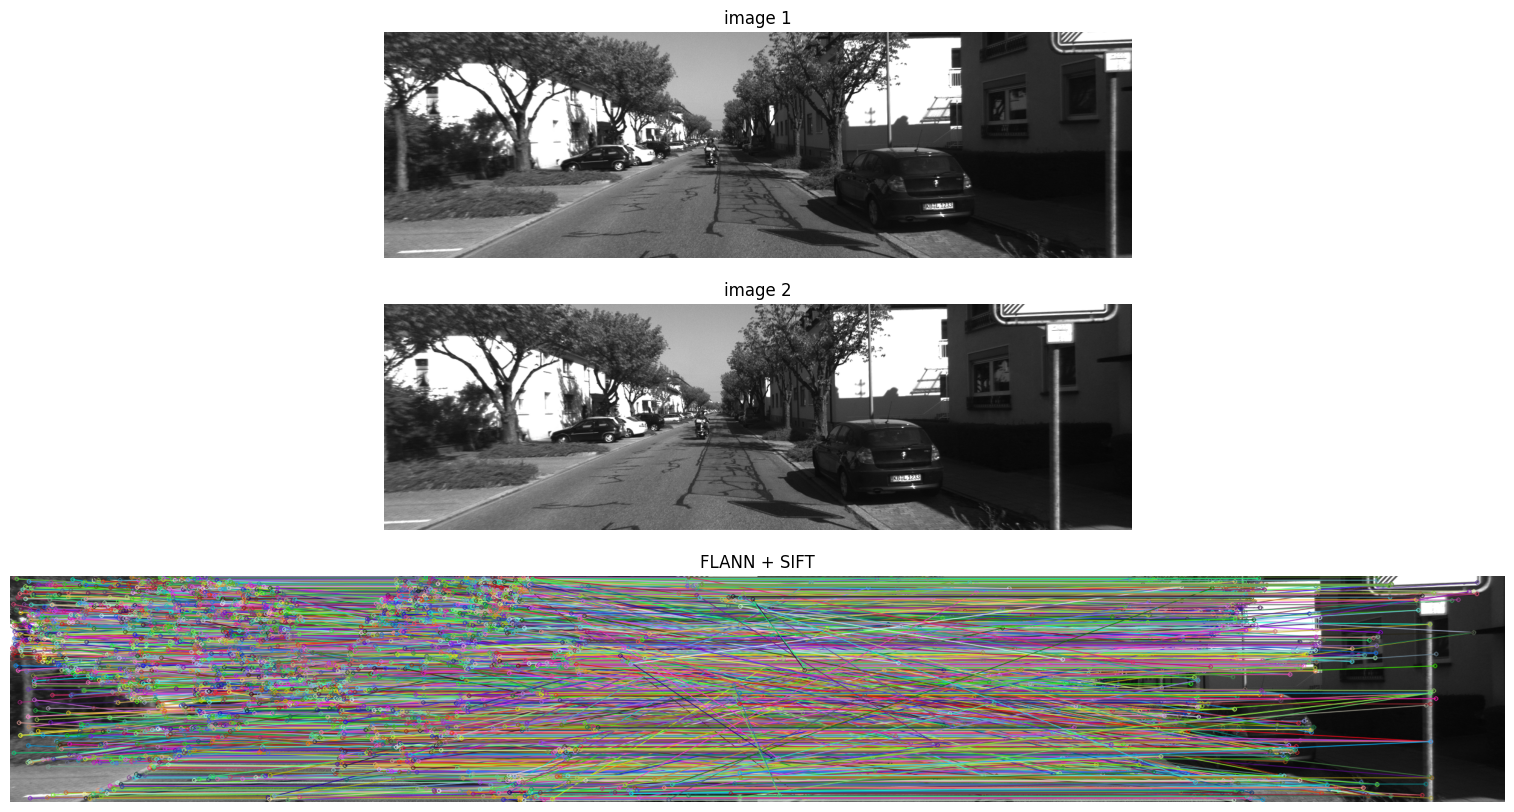

In [4]:
titles = ['image 1', 'image 2', 'FLANN + SIFT']
images = [image_1, image_2, res]

plt.figure(figsize=(20, 10))
for i in range(len(titles)):
    plt.subplot(3, 1, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()